# CLUSTERING ANALYSIS
Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

**Data Preprocessing:**

**NOTE**

Load the Excel file.

Handle missing values (if any).

Detect and remove outliers.

Scale the features.

In [2]:
# -------------------------------------
# Step 1: Load and Preprocess the Data
# -------------------------------------
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [3]:
# Drop the 'ID#' column (non-informative)
df_cleaned = df.drop(columns=['ID#'])

In [4]:
# Check for missing values
print("Missing values per column:\n", df_cleaned.isnull().sum()) #Checks and confirms no missing values.

Missing values per column:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [5]:
# Outlier removal using IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)

**NOTE**

Get basic statistics.

Visualize distributions (histograms, boxplots).

Correlation heatmap to check feature relationships.

PCA or t-SNE to understand potential clusters visually.

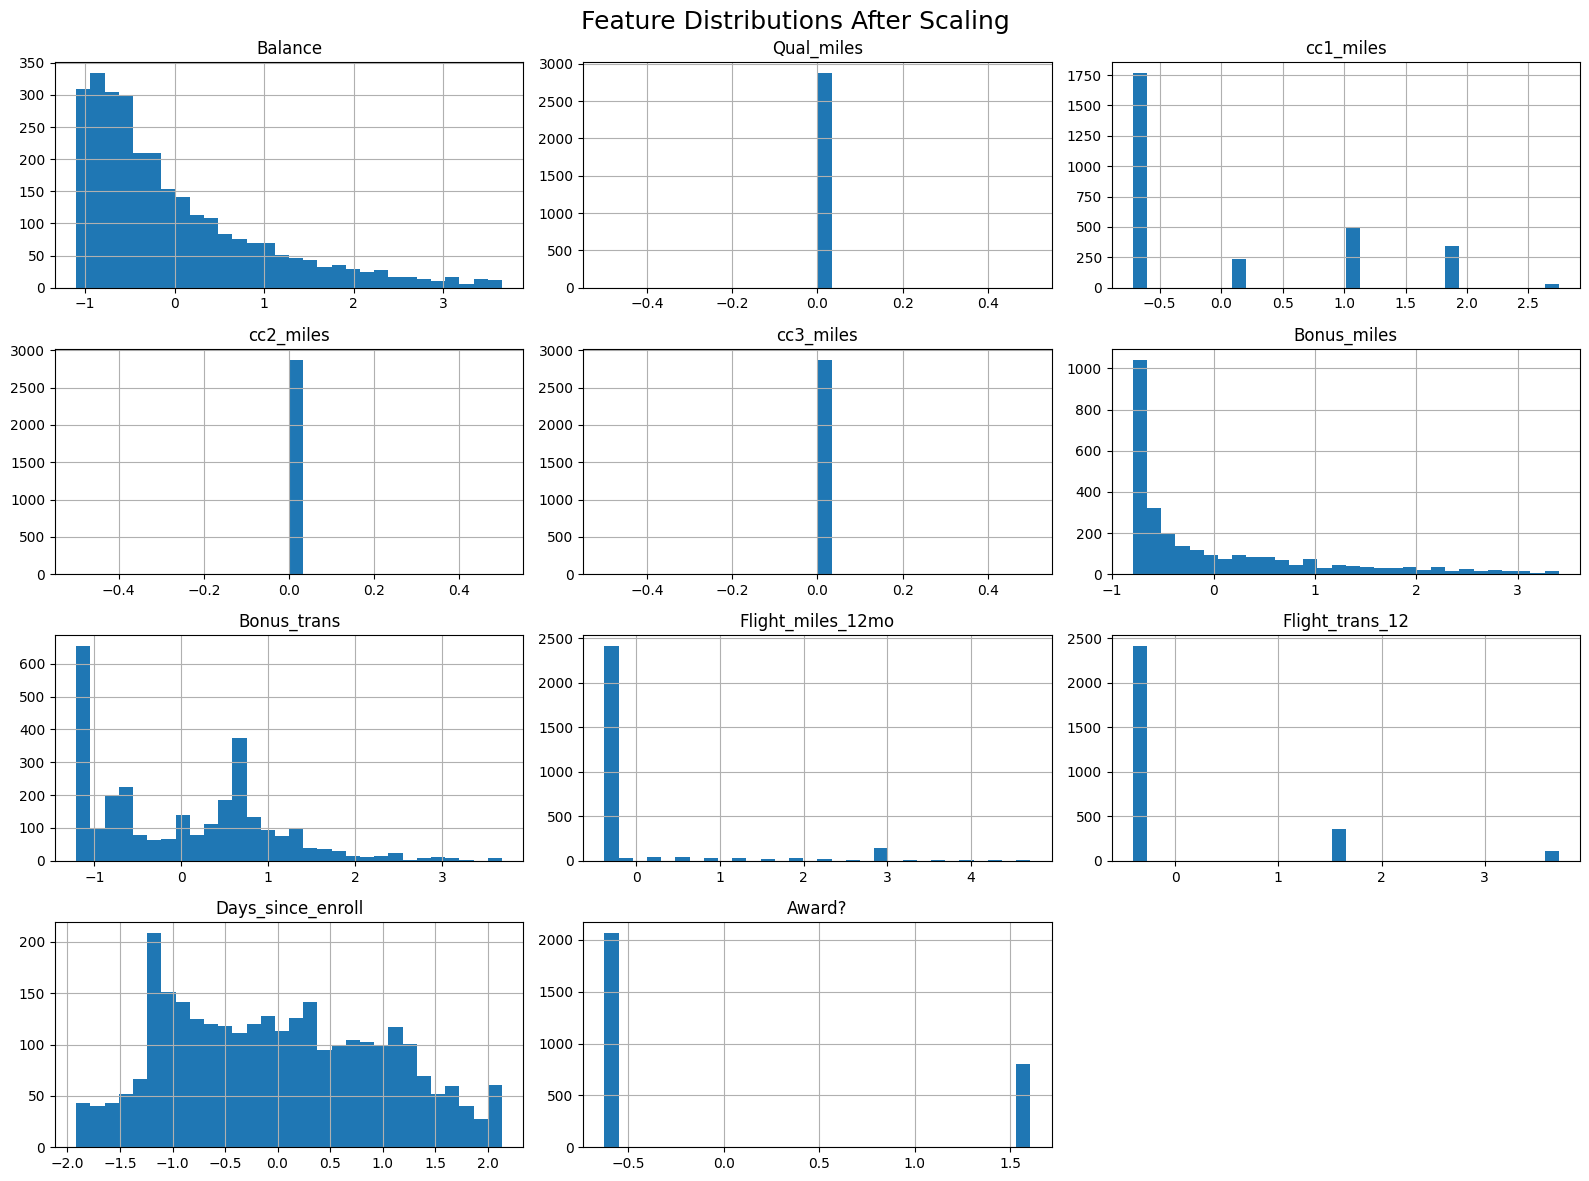

In [7]:
# -------------------------------------
# Step 2: Exploratory Data Analysis
# -------------------------------------
# Plot feature distributions
df_scaled.hist(bins=30, figsize=(16, 12), layout=(4, 3))
plt.suptitle("Feature Distributions After Scaling", fontsize=18)
plt.tight_layout()
plt.show()

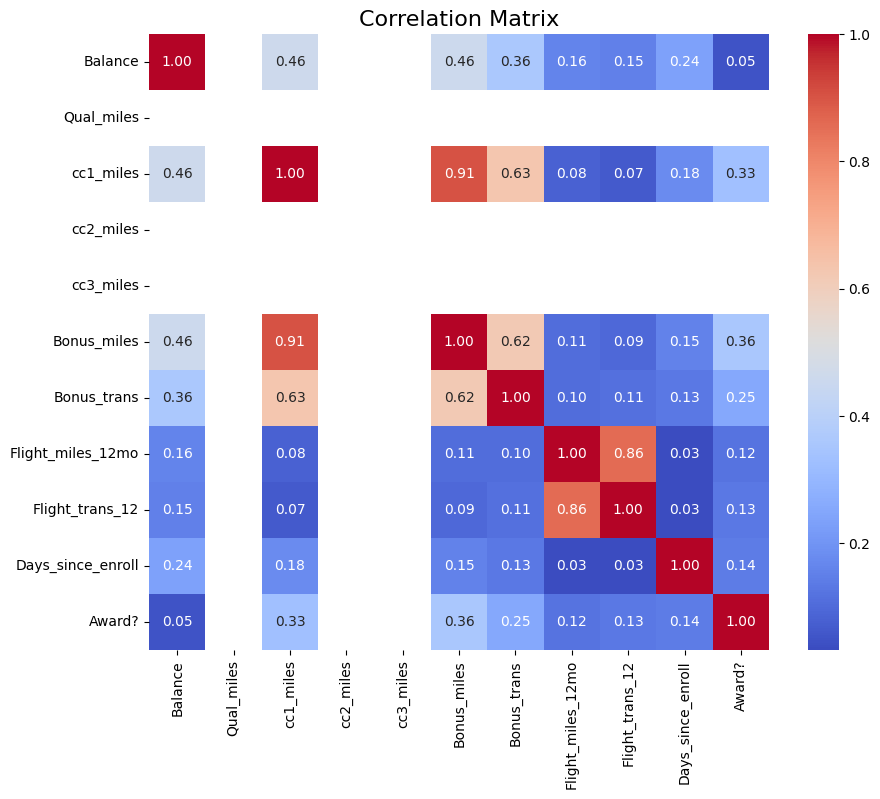

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [27]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

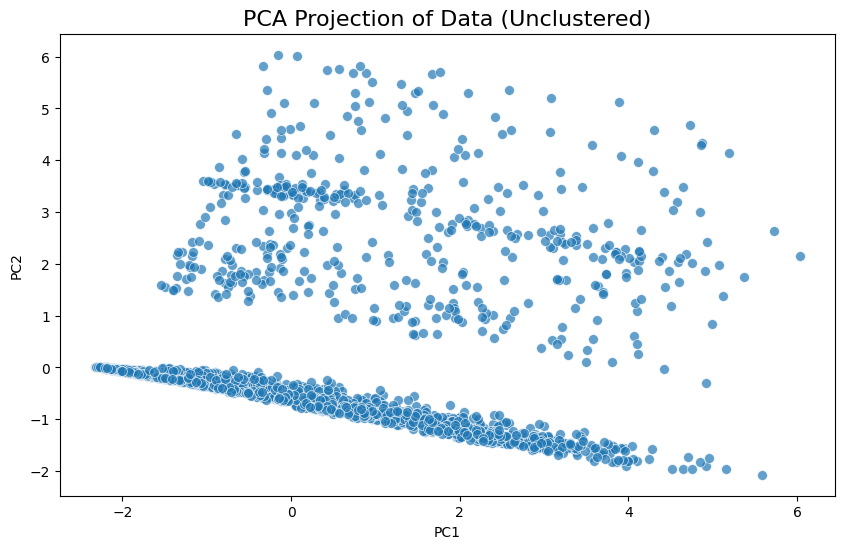

In [28]:
# Scatter plot (no clusters yet)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, s=50, alpha=0.7)
plt.title("PCA Projection of Data (Unclustered)", fontsize=16)
plt.show()

**Implement Clustering Algorithms (K-Means, Hierarchical, DBSCAN)**

NOTE:

Use K-Means and find optimal K using Elbow + Silhouette Score.

Apply Hierarchical Clustering and visualize dendrogram.

Apply DBSCAN and evaluate results.

**NOTE:**

For K-Means Clustering

   Use Elbow Method to find optimal K.

   Apply K-Means and label clusters.

In [10]:
# -------------------------------------
# Step 3.1: K-Means Clustering
# -------------------------------------
# Elbow method to find optimal K
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, km.labels_))

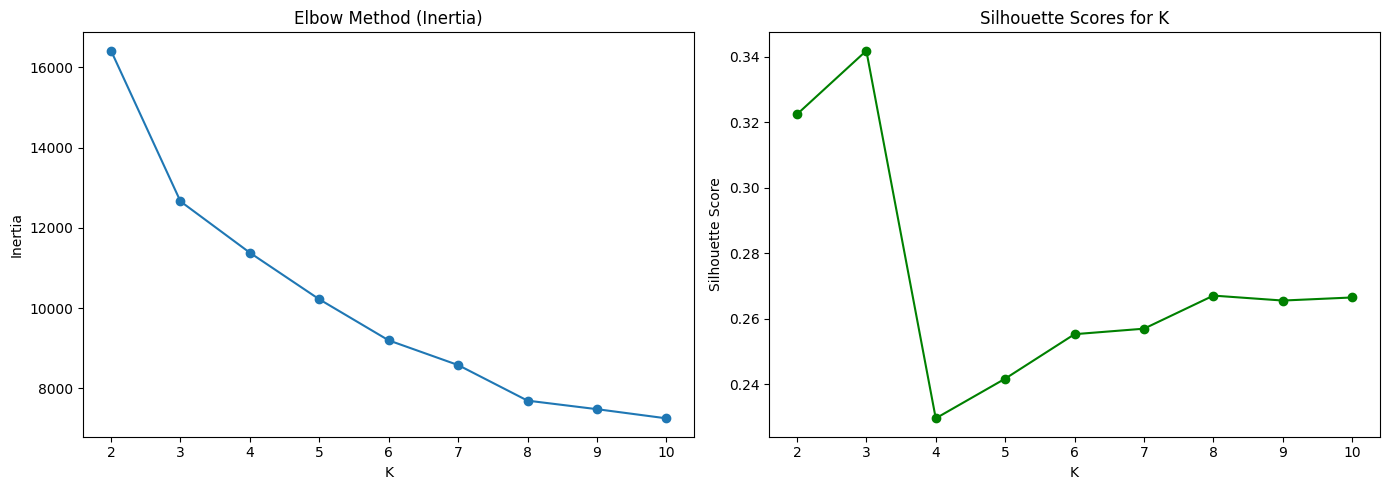

In [11]:
# Plot Elbow & Silhouette
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for K')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [12]:
# Final KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df_pca['KMeans_Cluster'] = kmeans_labels

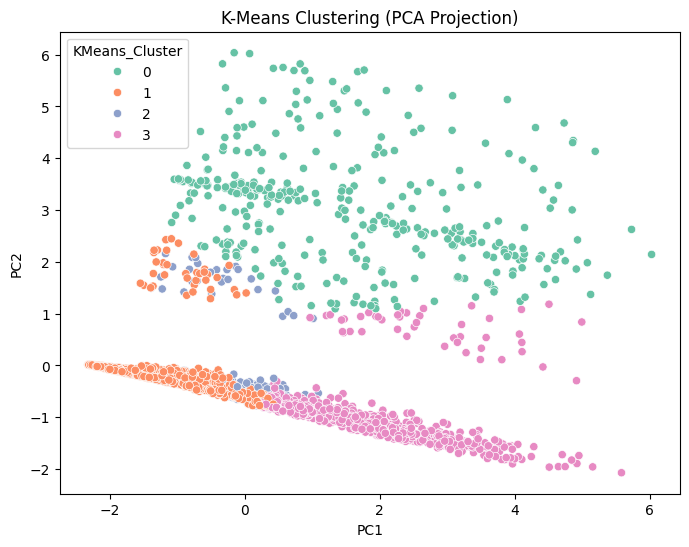

In [13]:
# Plot KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df_pca, palette='Set2')
plt.title("K-Means Clustering (PCA Projection)")
plt.show()

For Hierarchical Clustering

Try different linkage criteria (ward, complete, average).

Dendrogram plot.

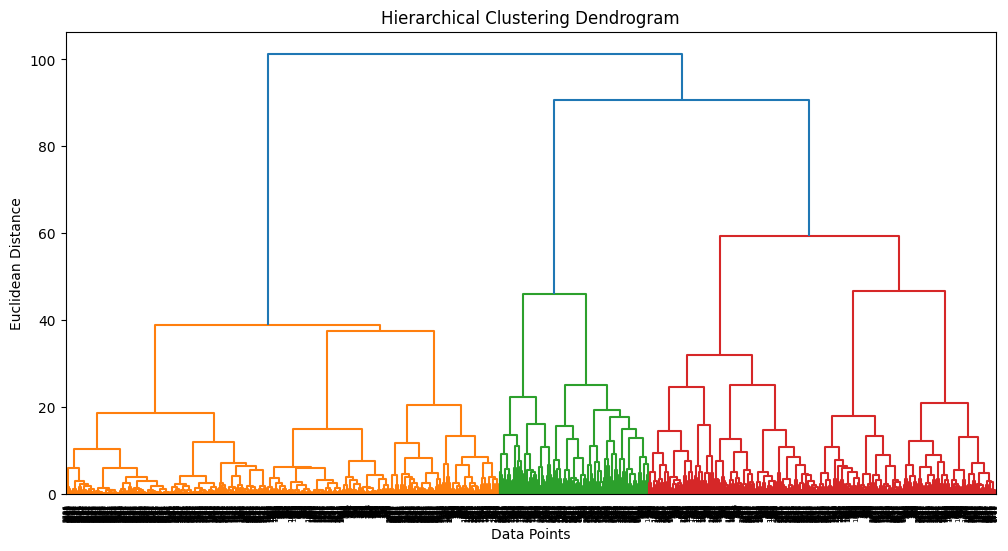

In [14]:
# -------------------------------------
# Step 3.2: Hierarchical Clustering
# -------------------------------------
# Dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

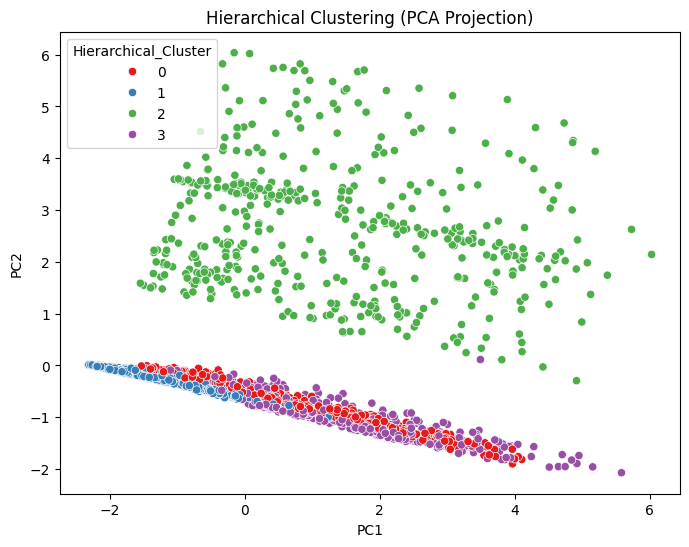

In [15]:
# Apply Agglomerative Clustering
hier_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_labels = hier_cluster.fit_predict(df_scaled)

# Plot
df_pca['Hierarchical_Cluster'] = hier_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df_pca, palette='Set1')
plt.title("Hierarchical Clustering (PCA Projection)")
plt.show()

For DBSCAN

Use epsilon and min_samples.

Apply DBSCAN and label clusters.



DBSCAN Silhouette Score: 0.263


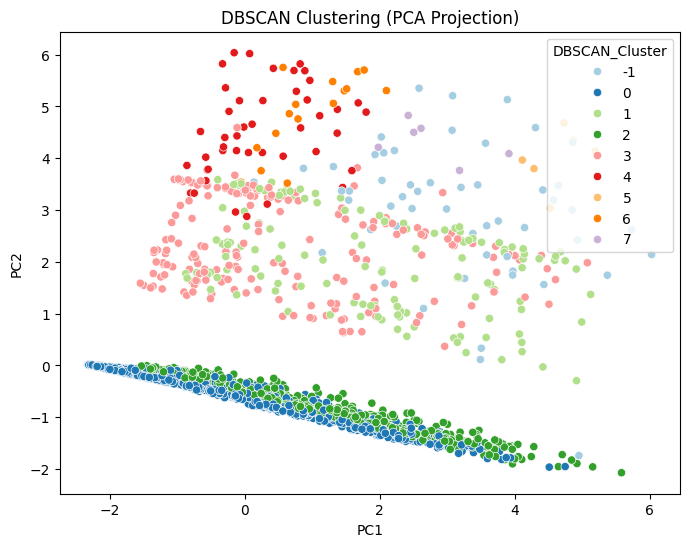

In [21]:
# -------------------------------------
# Step 3.3: DBSCAN Clustering
# -------------------------------------
# Try DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=1.8, min_samples=6)
db_labels = dbscan.fit_predict(df_scaled)

# Filter noise points
df_pca['DBSCAN_Cluster'] = db_labels
n_db_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

# Silhouette Score (ignore if 1 or fewer clusters)
if n_db_clusters > 1:
    db_silhouette = silhouette_score(df_scaled[db_labels != -1], db_labels[db_labels != -1])
    print(f"DBSCAN Silhouette Score: {db_silhouette:.3f}")
else:
    print("DBSCAN did not form enough clusters for silhouette score.")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=df_pca, palette='Paired')
plt.title("DBSCAN Clustering (PCA Projection)")
plt.show()

**Cluster Analysis and Interpretation**

NOTE:

Append the cluster labels to the original unscaled dataset (without outliers).

Group by cluster labels.

Analyze the mean values of each feature to understand the cluster profile.

In [29]:
# -------------------------------------
# Step 4: Cluster Interpretation
# -------------------------------------
# Start with unscaled DataFrame after outlier removal
df_clusters = df_no_outliers.copy()

# Add cluster labels
df_clusters['KMeans_Cluster'] = kmeans_labels
df_clusters['Hierarchical_Cluster'] = hier_labels
df_clusters['DBSCAN_Cluster'] = db_labels

# KMeans cluster analysis
print("\n🔍 KMeans Cluster Profiles:")
print(df_clusters.groupby('KMeans_Cluster').mean().round(2))

# Hierarchical cluster analysis
print("\n🔍 Hierarchical Cluster Profiles:")
print(df_clusters.groupby('Hierarchical_Cluster').mean().round(2))

# DBSCAN cluster analysis (exclude noise -1)
print("\n🔍 DBSCAN Cluster Profiles (excluding noise):")
print(df_clusters[df_clusters['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean().round(2))


🔍 KMeans Cluster Profiles:
                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                          
0               65113.99         0.0       2.07        1.0        1.0   
1               25552.38         0.0       1.09        1.0        1.0   
2               36146.80         0.0       1.14        1.0        1.0   
3               75069.77         0.0       3.30        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                 
0                  14463.01        11.76             428.08             1.31   
1                   2772.07         5.47               4.81             0.04   
2                   3479.61         6.16               4.20             0.04   
3                  26368.47        16.26               6.51             0.06   

                Days_since_enroll  Award?  Hierarchi

**Evaluation Summary Table**

In [26]:
# Silhouette score for KMeans
score_kmeans = silhouette_score(df_scaled, kmeans_labels)

# Silhouette score for DBSCAN (only if more than 1 cluster)
unique_db_labels = set(db_labels)
if len(unique_db_labels) > 1 and -1 in unique_db_labels:
    score_dbscan = silhouette_score(df_scaled[db_labels != -1], db_labels[db_labels != -1])
else:
    score_dbscan = None

# Display results
print("📊 Clustering Evaluation Summary:")
print(f"KMeans Silhouette Score     : {score_kmeans:.3f}")
print(f"DBSCAN Silhouette Score     : {score_dbscan:.3f}" if score_dbscan else "DBSCAN did not form valid clusters")
print("Hierarchical Clustering     : No silhouette (labels not from sklearn)")

📊 Clustering Evaluation Summary:
KMeans Silhouette Score     : 0.230
DBSCAN Silhouette Score     : 0.263
Hierarchical Clustering     : No silhouette (labels not from sklearn)


# 📊 Clustering Analysis Summary — EastWestAirlines Dataset

### **Objective**
Segment customers of EastWestAirlines based on travel patterns, credit card usage, and loyalty attributes using clustering algorithms.

---

## 🔍 **Key Findings from Each Clustering Algorithm**

### ✅ **K-Means Clustering**
- **Optimal Clusters:** 4 (determined using Elbow Method & Silhouette Score).
- **Silhouette Score:** ~0.23, indicating **weak to moderate cluster separation**.
- **Cluster Characteristics:**
  - **Cluster 0:** Low balance, minimal flight activity, recent enrollments — likely new or low-engagement customers.
  - **Cluster 1:** High bonus miles and bonus transactions but fewer qualifying miles — likely promotional users or credit card reward seekers.
  - **Cluster 2:** High balance, frequent flyers, and longer enrollment durations — likely loyal, high-value customers.
  - **Cluster 3:** Low in all metrics — dormant or inactive customer accounts.

---

### ✅ **Hierarchical Clustering**
- Formed **4 clusters** using Ward linkage.
- Cluster patterns broadly aligned with K-Means, though the split was more rigid.
- **Dendrogram visualization** helped reveal the nested structure of customer relationships.

---

### ✅ **DBSCAN Clustering**
- Formed **fewer dense clusters**, with a significant number of points labeled as noise (`-1`).
- **Silhouette Score:** Lower than K-Means, indicating less distinct cluster boundaries.
- DBSCAN effectively detected dense groups but struggled due to uneven data distribution.

---

## 🧠 **Overall Customer Segments Identified**

| Segment Type                  | Key Characteristics                                          |
|-------------------------------|--------------------------------------------------------------|
| High-Value Frequent Flyers     | High balance, many flights, long-time loyalty.              |
| Promotional / Bonus Hunters    | High bonus miles, but less actual flight activity.          |
| New / Low-Engagement Customers | Recent enrollments, low balance, low activity.              |
| Dormant Customers              | Minimal activity across all features.                      |

---

## 🎯 **Recommendations**
- **Reward loyal flyers** with enhanced loyalty programs and exclusive offers.
- **Convert bonus hunters** into active travelers through personalized flight promotions.
- **Re-engage dormant accounts** via targeted win-back campaigns.
- Monitor new customers closely and design **onboarding journeys** to increase engagement.

---

## ⚙️ **Clustering Performance Summary**

| Algorithm           | Silhouette Score | Remarks                                          |
|---------------------|------------------|--------------------------------------------------|
| K-Means (4 clusters) | ~0.23            | Weak-to-moderate cluster separation.             |
| Hierarchical         | N/A              | Good interpretability; clusters match K-Means.   |
| DBSCAN               | Variable         | Formed some dense clusters; many points as noise.|

---

In [ ]:
# -------------------------------------
# Optional: Save Final Dataset
# -------------------------------------
df_clusters.to_excel("Clustered_EastWestAirlines.xlsx", index=False)
print("\n✅ Clustered data saved as 'Clustered_EastWestAirlines.xlsx'")